In [1]:
import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import dask.bag as db
import dask.delayed

# Dask Array

In [2]:
np_arr = np.arange(11)
np_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
dask_arr = da.from_array(np_arr, chunks=5)
dask_arr

dask.array<array, shape=(11,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

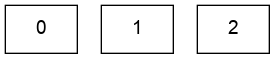

In [4]:
dask_arr.visualize()

In [5]:
dask_arr.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
dask_arr.mean().compute()

5.0

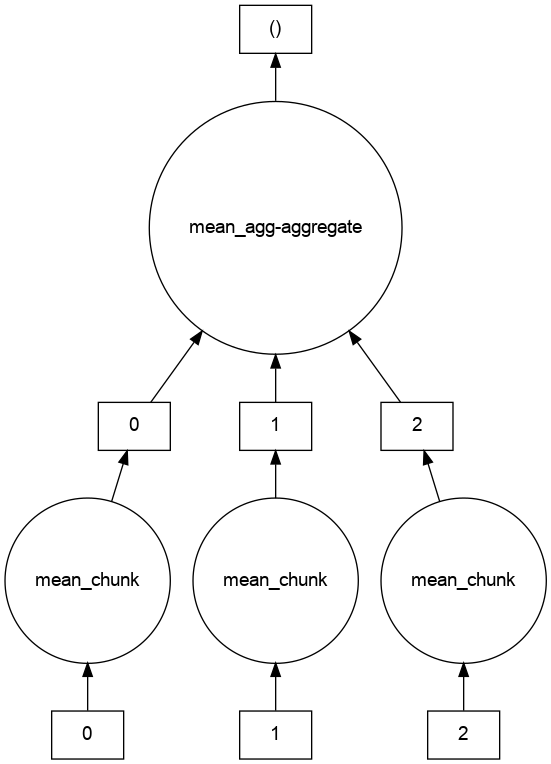

In [7]:
res = dask_arr.mean()
res.visualize()

In [8]:
dask_arr.chunks

((5, 5, 1),)

In [9]:
dask_arr2 = da.arange(11, chunks=5)
dask_arr2.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Comparision numpy array performance with dask array

In [10]:
x = np.random.rand(50 * 365 * 24 * 60 * 10)
x.shape

(262800000,)

In [11]:
%%time

x_sum = x.sum()
x_sum

CPU times: user 100 ms, sys: 2.5 ms, total: 103 ms
Wall time: 102 ms


131397465.25506176

In [12]:
x_dask = da.from_array(x, chunks=len(x) // 8)
x_dask

dask.array<array, shape=(262800000,), dtype=float64, chunksize=(32850000,), chunktype=numpy.ndarray>

In [13]:
%%time
x_dask_sum = x_dask.sum().compute()
x_dask_sum

CPU times: user 342 ms, sys: 3.13 ms, total: 345 ms
Wall time: 59.1 ms


131397465.25506216

# Dask DataFrame

In [14]:
dask_df = dd.read_csv('/home/tigran/Downloads/code/Data/StateFarm.csv', sep=';')
dask_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,18975.456110,65999,237,1,14,0,6,0
1,4715.321344,0,65,19,56,0,3,0
2,5018.885233,54500,63,28,17,0,6,0
3,4932.916345,37260,62,19,42,0,8,0
4,5744.229745,68987,71,11,40,0,6,0


In [15]:
df = pd.read_csv('/home/tigran/Downloads/code/Data/StateFarm.csv', sep=';')
dask_df2 = dd.from_pandas(df, npartitions=2)

# Dask Bag

In [16]:
dask_bag = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)
dask_bag.take(3)

(1, 2, 3)

# Dask delayed interface

In [17]:
def inc(x):
    return x + 1

def double(x):
    return x + 2

def add(x, y):
    return x + y

In [18]:
data = [1, 2, 3, 4, 5]
output = []

In [19]:
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)
    
total = sum(output)

In [20]:
output = []

for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)
    
total = dask.delayed(sum)(output)

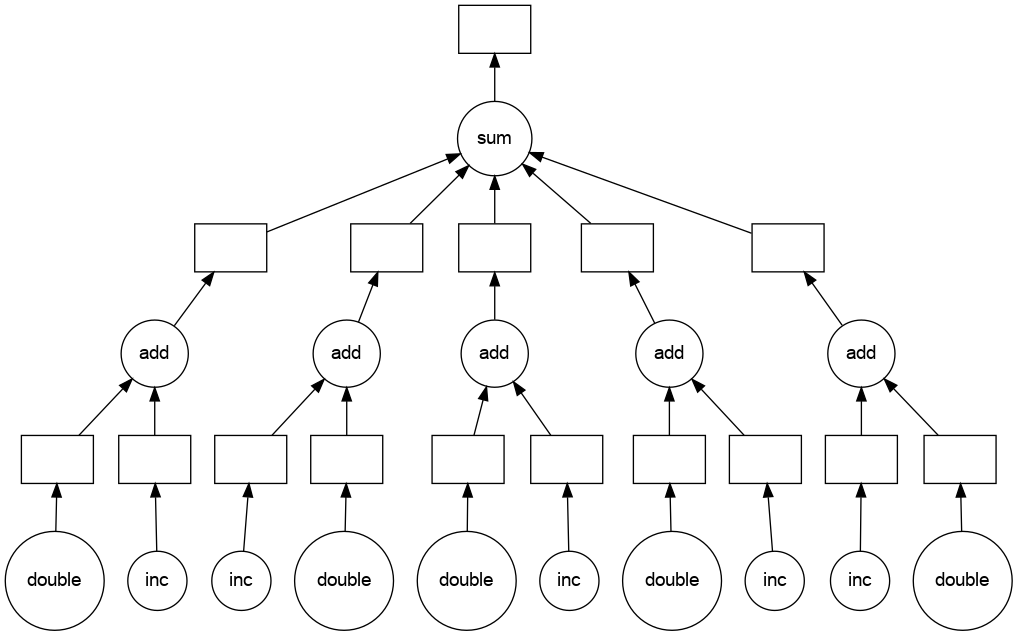

In [21]:
total.visualize()

In [22]:
total.compute()

45

In [23]:
@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def double(x):
    return x + 2

@dask.delayed
def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]
output = []

for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)
    
total = dask.delayed(sum)(output)
print(total.compute())

45


# Dask-ML

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler, DummyEncoder, Categorizer
from dask_ml.impute import SimpleImputer
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression

In [25]:
df_dask = dd.read_csv('/home/tigran/Downloads/code/Data/StateFarm_missing.csv', sep=';')
df_dask.head()

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,2763.519279,Basic,Bachelor,Employed,F,56274.0,NaN,32.0,5.0,NaN,1.0,No
1,NaN,NaN,Bachelor,Unemployed,F,0.0,NaN,13.0,42.0,NaN,NaN,No
2,NaN,NaN,NaN,Employed,F,48767.0,108.0,NaN,38.0,0.0,NaN,No
3,7645.861827,Basic,Bachelor,NaN,NaN,0.0,106.0,18.0,NaN,NaN,7.0,No
4,2813.692575,Basic,Bachelor,NaN,M,43836.0,73.0,12.0,NaN,NaN,1.0,No


In [26]:
type(df_dask)

dask.dataframe.core.DataFrame

In [27]:
len(df_dask), len(df_dask.count())

(8293, 12)

In [28]:
df_dask.describe().compute()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,8289.000000,8291.000000,8282.000000,8288.000000,8285.000000,8287.000000,8288.000000
mean,7987.650889,37785.171994,93.198865,15.079875,48.138081,0.389767,2.964768
std,6841.535432,30396.251967,34.514287,10.093847,27.827103,0.915515,2.389635
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3982.180708,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,5786.493980,34220.000000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8960.280213,62450.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


In [29]:
print(df_dask.columns.tolist())

['Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Response']


In [30]:
df_dask.isnull().compute().sum()

Customer Lifetime Value           4
Coverage                          5
Education                         3
EmploymentStatus                  5
Gender                            4
Income                            2
Monthly Premium Auto             11
Months Since Last Claim           5
Months Since Policy Inception     8
Number of Open Complaints         6
Number of Policies                5
Response                          0
dtype: int64

In [31]:
df_dask.dtypes

Customer Lifetime Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Response                          object
dtype: object

In [32]:
cat_columns = df_dask.select_dtypes(include='object').columns.tolist()
cat_columns

['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Response']

In [33]:
df_dask[cat_columns].describe().compute()

,Coverage,Education,EmploymentStatus,Gender,Response
unique,3,5,5,2,2
count,8288,8290,8288,8289,8293
top,Basic,Bachelor,Employed,F,No
freq,5038,2496,5187,4250,7462


In [34]:
cat = Categorizer(columns=cat_columns)
df_dask = cat.fit_transform(df_dask)

In [35]:
dct = {'No': 0, 'Yes': 1}
df_dask['Response'] = df_dask['Response'].replace(dct)

In [36]:
for col in cat_columns:
    print(df_dask[col].value_counts().compute())

Basic       5038
Extended    2501
Premium      749
Name: Coverage, dtype: int64
Bachelor                2496
College                 2421
High School or Below    2397
Master                   659
Doctor                   317
Name: Education, dtype: int64
Employed         5187
Unemployed       2095
Medical Leave     392
Disabled          362
Retired           252
Name: EmploymentStatus, dtype: int64
F    4250
M    4039
Name: Gender, dtype: int64
0    7462
1     831
Name: Response, dtype: int64


In [37]:
y_dask = df_dask.pop('Response')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_dask, y_dask, test_size=0.3, shuffle=True, random_state=42)

In [39]:
num_columns = X_train.select_dtypes(include='number').columns.tolist()
num_columns

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies']

In [40]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_columns])

X_train[num_columns] = num_imputer.transform(X_train[num_columns])
X_test[num_columns] = num_imputer.transform(X_test[num_columns])

In [43]:
cat_columns.pop()

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[cat_columns])

X_train[cat_columns] = cat_imputer.transform(X_train[cat_columns])
X_test[cat_columns] = cat_imputer.transform(X_test[cat_columns])

In [44]:
cat_columns

['Coverage', 'Education', 'EmploymentStatus', 'Gender']

In [46]:
print(X_train.isnull().compute().sum().sum())
print(X_test.isnull().compute().sum().sum())

0
0


In [47]:
scaler = StandardScaler()
scaler.fit(X_train[num_columns])

X_train[num_columns] = scaler.transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_train[num_columns])

In [48]:
dum = DummyEncoder()
dum.fit(X_train)

X_train = dum.transform(X_train)
X_test = dum.transform(X_test)

X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Coverage_Basic,Coverage_Premium,Coverage_Extended,...,Education_Master,Education_High School or Below,Education_Doctor,EmploymentStatus_Employed,EmploymentStatus_Unemployed,EmploymentStatus_Medical Leave,EmploymentStatus_Disabled,EmploymentStatus_Retired,Gender_F,Gender_M
5665,-0.435967,-0.489744,-0.820202,0.493984,0.168462,-0.420026,2.521122,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3273,1.263635,-0.465154,3.462868,1.489298,-1.265742,-0.420026,1.267090,0,0,1,...,0,0,0,1,0,0,0,0,0,1
6804,0.231320,-1.241654,-0.174808,-0.202736,0.993130,-0.420026,-0.404952,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4106,0.172931,0.616429,0.617267,-1.297581,-1.445017,-0.420026,0.013058,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5495,0.025953,0.131054,-0.732194,0.095858,0.921420,-0.420026,-0.404952,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [67]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)
logreg.fit(X_train.to_dask_array(lengths=True), y_train.to_dask_array(lengths=True))
logreg.score(X_test.to_dask_array(lengths=True), y_test.to_dask_array(lengths=True)).compute()

9.002837454398054e-01

In [68]:
pred = logreg.predict(X_test.to_dask_array(lengths=True)).compute()
accuracy_score(y_test, pred)

9.002837454398054e-01

# Dask Pipeline

In [71]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler, DummyEncoder, Categorizer
from dask_ml.impute import SimpleImputer

from pandas.api.types import CategoricalDtype
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from dask_ml.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from dask_ml.model_selection import train_test_split

In [73]:
df_dask = dd.read_csv('/home/tigran/Downloads/code/Data/StateFarm_missing.csv', sep=';')
df_dask.head()

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,2763.519279,Basic,Bachelor,Employed,F,56274.0,NaN,32.0,5.0,NaN,1.0,No
1,NaN,NaN,Bachelor,Unemployed,F,0.0,NaN,13.0,42.0,NaN,NaN,No
2,NaN,NaN,NaN,Employed,F,48767.0,108.0,NaN,38.0,0.0,NaN,No
3,7645.861827,Basic,Bachelor,NaN,NaN,0.0,106.0,18.0,NaN,NaN,7.0,No
4,2813.692575,Basic,Bachelor,NaN,M,43836.0,73.0,12.0,NaN,NaN,1.0,No


In [74]:
df_dask['Response'] = df_dask['Response'].replace({'No': 0, 'Yes': 1})
y_dask = df_dask.pop('Response')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_dask, 
                                                   y_dask,
                                                   shuffle=True,
                                                   test_size=0.3,
                                                   random_state=42)

In [76]:
number = X_train.select_dtypes(include='number').columns.tolist()
number

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies']

In [77]:
categ = X_train.select_dtypes(include='object').columns.tolist()
categ

['Coverage', 'Education', 'EmploymentStatus', 'Gender']

In [78]:
for col in categ:
    print(X_train[col].unique().compute())
    print('')

0       Basic
1    Extended
2     Premium
3         NaN
Name: Coverage, dtype: object

0                 College
1                Bachelor
2    High School or Below
3                  Master
4                     NaN
5                  Doctor
Name: Education, dtype: object

0    Medical Leave
1         Employed
2       Unemployed
3          Retired
4         Disabled
5              NaN
Name: EmploymentStatus, dtype: object

0      M
1      F
2    NaN
Name: Gender, dtype: object



In [79]:
for col in categ:
    X_train[col] = X_train[col].astype('str')

In [80]:
for col in categ:
    print(X_train[col].unique().compute())
    print('')

0       Basic
1    Extended
2     Premium
3         nan
Name: Coverage, dtype: object

0                 College
1                Bachelor
2    High School or Below
3                  Master
4                     nan
5                  Doctor
Name: Education, dtype: object

0    Medical Leave
1         Employed
2       Unemployed
3          Retired
4         Disabled
5              nan
Name: EmploymentStatus, dtype: object

0      M
1      F
2    nan
Name: Gender, dtype: object



In [81]:
coverage_lst = sorted(X_train['Coverage'].unique().compute().tolist())
educ_lst = sorted(X_train['Education'].unique().compute().tolist())
empl_lst = sorted(X_train['EmploymentStatus'].unique().compute().tolist())
gender_lst = sorted(X_train['Gender'].unique().compute().tolist())

In [82]:
categories = {'Coverage': CategoricalDtype(coverage_lst, ordered=False),
             'Education': CategoricalDtype(educ_lst, ordered=False),
             'EmploymentStatus': CategoricalDtype(empl_lst, ordered=False),
             'Gender': CategoricalDtype(gender_lst, ordered=False)}

In [83]:
num_pipe = Pipeline([
    ('imp', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [84]:
cat_pipe = Pipeline([
    ('categ', Categorizer(categories=categories)),
    ('dum', DummyEncoder())
])

In [85]:
transformers = [('num', num_pipe, number),
               ('cat', cat_pipe, categ)]

In [86]:
transformer = ColumnTransformer(transformers=transformers)

In [87]:
ml_pipe = Pipeline([
    ('tf', transformer),
    ('logreg', LogisticRegression(fit_intercept=False, n_jobs=-1))
])

In [88]:
ml_pipe.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer Lifetime Value',
                                                   'Income',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies']),
                                                 ('cat',
                                                  Pipeline(steps=[('categ',
                                                                   Categorizer(categories={'Coverag...
, ordered=False),
                                                                                           'EmploymentStatus': CategoricalDtype(categories=['Disabled', 'Employed', 'Medical Leave', 'Retired',
                  'Unemployed', 'nan'],
, ordered=False),
                                                                                           'Gender': CategoricalDtype(categories=['F', 'M', 'nan'], ordered=False)})),
                                                                  ('dum',
                                                                   DummyEncoder())]),
                                                  ['Coverage', 'Education',
                                                   'EmploymentStatus',
                                                   'Gender'])])),
                ('logreg', LogisticRegression(fit_intercept=False, n_jobs=-1))])

In [89]:
preds = ml_pipe.predict(X_test)
accuracy_score(y_test, preds)

8.986623429266315e-01